<a href="https://colab.research.google.com/github/aatiqa-ghazali/new-repo/blob/master/mydata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nibabel==3.2.0.

     |████████████████████████████████| 3.3MB 9.0MB/s 
  Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


In [7]:
import os , glob
import nibabel as nib
import numpy as np 
import matplotlib.pyplot as plt
import cv2

In [8]:

import torch
import torch.nn as nn
from torch import optim
from tqdm import tqdm

In [9]:
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split

In [10]:
# STEP 1 - Load and visualize data
#the idea behind image normalization is not only to remove noise 
#but at the same time to bring the image into a range of intensity values that is 'normal'.
dataInputPath = '/content/drive/MyDrive/part1/'
imagePathInput = os.path.join(dataInputPath, 'image/')
labelPathInput = os.path.join(dataInputPath, 'label/')

dataOutputPath = '/content/drive/MyDrive/Colab Notebooks/data/slices'
imageSliceOutput = os.path.join(dataOutputPath, 'img/')
maskSliceOutput = os.path.join(dataOutputPath, 'labels/')


imgfiles = os.listdir(imagePathInput)
labelfiles=os.listdir(labelPathInput)
#The unit of measurement in CT scans is the Hounsfield Unit (HU), 
#which is a measure of radiodensity. CT scanners are carefully calibrated to accurately measure this
# STEP 2 - Image normalization
HOUNSFIELD_MIN = -1000
HOUNSFIELD_MAX = 2000
HOUNSFIELD_RANGE = HOUNSFIELD_MAX - HOUNSFIELD_MIN

# STEP 3 - Slicing and saving
SLICE_X = True
SLICE_Y = True
SLICE_Z = False

SLICE_DECIMATE_IDENTIFIER = 3

In [11]:
# Load image and see max min Hounsfield units
imgPath = os.path.join('/content/drive/MyDrive/part1/image', 'case_1.nii.gz')
img = nib.load(imgPath).get_fdata()
np.min(img), np.max(img), img.shape, type(img)

(0.25066666666666665, 1.0, (346, 233, 186), numpy.ndarray)

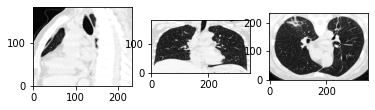

In [12]:

n_i, n_j, n_k = img.shape

# sagittal (left image)
center_i1 = int((n_i - 1) / 2)
# coronal (center image)
center_j1 = int((n_j - 1) / 2)
# axial slice (right image)
center_k1 = int((n_k - 1) / 2)
show_slices([img[center_i1, :, :],
                img[:, center_j1, :],
                img[:, :, center_k1]])




  

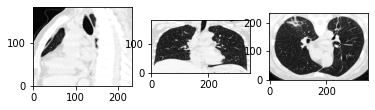

In [14]:
result = resize_data_volume_by_scale(img, 1)
n_i, n_j, n_k = result.shape

# sagittal (left image)
center_i1 = int((n_i - 1) / 2)
# coronal (center image)
center_j1 = int((n_j - 1) / 2)
# axial slice (right image)
center_k1 = int((n_k - 1) / 2)
show_slices([result[center_i1, :, :],
                result[:, center_j1, :],
                result[:, :, center_k1]])


In [5]:
import scipy.ndimage

def resize_data_volume_by_scale(data, scale):
   """
   Resize the data based on the provided scale
   """
   scale_list = [scale,scale,scale]
   return scipy.ndimage.interpolation.zoom(data, scale_list, order=0)




In [4]:
def show_slices(slices):
   """
   Function to display a row of image slices
   Input is a list of numpy 2D image slices
   """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [3]:
import scipy

def resize_data_volume_by_scale(data, scale):
   """
   Resize the data based on the provided scale
   """
   scale_list = [scale,scale,scale]
   return scipy.ndimage.interpolation.zoom(data, scale_list, order=0)




In [74]:
#resize all the images to a fixed size

preprocess(imgfiles,imagePathInput,labelfiles,labelPathInput)

In [70]:
# Load image label and see max min Hounsfield units
labelPath = os.path.join(labelPathInput, 'case_20.nii.gz')
label = nib.load(labelPath).get_fdata()
np.min(label), np.max(label), label.shape, type(label)

(0.0, 1.0, (428, 286, 261), numpy.ndarray)

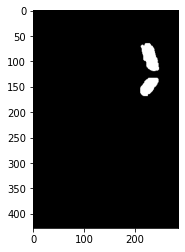

In [71]:
# Show label slice
imgslice = label[:,:,20]
plt.imshow(imgslice, cmap='gray')
plt.show()

In [73]:
def preprocess(Ifiles,Ilinks,Lfiles,Llinks):
  for file in Ifiles:
    imgPath = os.path.join(Ilinks, file)
    img = nib.load(imgPath).get_fdata()
    img = img.transpose(2, 1, 0)
    new2=np.resize(img,(258,350))
    img = nib.nifti1.Nifti1Image(new2, None)
    nib.save(img,os.path.join('/content/drive/MyDrive/newdata/img', file))
    
    
  for file2 in Lfiles:
    LPath = os.path.join(Llinks, file2)
    label = nib.load(LPath).get_fdata()
    label = label.transpose(2, 1, 0)
    new3=np.resize(label,(258,350))
    label = nib.nifti1.Nifti1Image(new3, None)
    nib.save(img,os.path.join('/content/drive/MyDrive/newdata/label', file2))



    



In [78]:
#reload new images
newdataInputPath = '/content/drive/MyDrive/newdata/'
imagePathInput = os.path.join(newdataInputPath, 'img/')
labelPathInput = os.path.join(newdataInputPath, 'label/')



In [76]:
# Load image and see max min Hounsfield units
imgPath = os.path.join(imagePathInput, 'case_20.nii.gz')
img = nib.load(imgPath).get_fdata()
np.min(img), np.max(img), img.shape, type(img)

(0.25066666666666665, 1.0, (258, 350), numpy.ndarray)

In [79]:
labelPath = os.path.join(labelPathInput, 'case_20.nii.gz')
label = nib.load(labelPath).get_fdata()
np.min(label), np.max(label), label.shape, type(label)

(0.25066666666666665, 1.0, (258, 350), numpy.ndarray)

TypeError: ignored

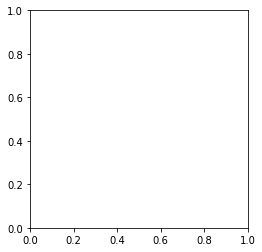

In [85]:
# Show label slice
imgslice = label[20,20]
plt.imshow(imgslice, cmap='gray')
plt.show()